(ukol4)=
# Zápočtový úkol 4

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #E0B32C; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #FFF3CD; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Úkol</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Uvažujte následující situaci. Provádíte experiment a naměříte sadu dat. Bohužel jste ale ztratili vaše teoretické poznámky k experimentu a již nevíte, jakým zákonem/vzorečkem se data řídí. Nedokážete již tedy proložit data odpovídající modelovou funkcí a získat parametry tohoto modelu. Přesto nezačnete zoufat a tuto patálii vyřešíte pomocí numerických nástrojů na počítači. Záchranou je pro vás, že jste si zapamatovali, že se data řídí polynomiální závislostí. Již ale neznáte přesný stupeň onoho polynomu.

Definice úlohy:
Uvažujte $N=100$ dvojic $(x_i, y_i)$ tvořící experimentální data. Data získáte pomocí funkce `(xdata, ydata) = proved_experiment()` (implementované v binárním souboru `experiment.exe`), která volí náhodný stupeň polynomu $m \in [0,10]$, pro který vygeneruje odpovídající náhodná data s přidaným gausovským šumem (podle normálního rozdělení). Funkce vrací dva vektory/pole $\vec{x}$ a $\vec{y}$. S každým novým voláním této funkce jsou vygenerována data pro jiný modelový polynom!

1. Vygenerujte experimentální data pomocí připravené funkce `proved_experiment()`.

2. Rozdělte data na *trénovací* a *testovací* v poměru 3:1 (testovacích dat je třeba méně). Rozdělte data do skupin náhodně tak, aby byly data rovnoměrně rozprostřeny v celém intervalu v obou skupinách!

3. Natrénujte/spočítejte parametry modelu s využitím *trénovacích dat*.

4. Aplikujte model na *testovací data* a spočítejte chybu, které se model na těchto datech dopouští - účelová funkce $S$ (viz cvičení).

5. Opakujte kroky 3. a 4. pro různé stupně polynomu a na základě chyby testovacích dat určete parametry a ideální stupeň polynomu modelu.

Cílem je pro libovolné zavolání funkce experimentu najít ideální model, který odpovídá datům nejlépe. Funkce `proved_experiment()` se již nachází v jedné z následující připravené buňce v tomto notebooku, stačí funkci zavolat. Pokud chcete řešit úlohu lokálně na osobním počítači, je třeba si spolu s notebookem stáhnout soubor `experiment.exe` ze složky `ukoly/` (z GitHub repozitáře - odkaz na webu).

Pokud používáte Linux, použijte binární soubor `experiment`.

Vykreslete závislost testovací chyby na stupni modelového polynomu. Vykreslete vygenerované data a funkci optimálního modelu.

*Bonus:*

Upravte krok 2. tak, že místo jednoduché validace použijete pokročilejší [křížovou validaci](https://cs.wikipedia.org/wiki/K%C5%99%C3%AD%C5%BEov%C3%A1_validace) (cross validation). Použijte například [tento typ](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#Leave-one-out_cross-validation) cross validace. Tato metoda je efektivnější pro ohodnocení modelu pro malé množství dat.
</p>
</div>
</div>

<div style="margin-top: 25px; margin-bottom: 25px; padding-top: 0px; padding-bottom: 0px; padding-left: 0px; padding-right: 0px; border-radius: 4px; border-color: #276BE9; border-right-width: 1px; border-top-width: 1px; border-bottom-width: 1px; border-left-width: 3px; border-style: solid">
<div style="background: #DCE7FC; color: #000000; padding-left: 20px; padding-top: 10px; padding-bottom: 10px; border-radius: 1px 3px 0px 0px; font-weight: 600">Poznámka</div>
<div style="padding-left: 20px; padding-right: 20px; padding-top: 0px; padding-bottom: 0px; border-radius: 0px 0px 3px 3px">
<p>

Validace - rozdělení dat na trénovací a testovací části - se běžně používá při modelování dat. Je to základní nástroj pro ohodnocení například neuronových sítí.

Princip spočívá v balacování mezi přetrénováním (oversampling) a podtrénováním (undersampling - bias). Tato myšlenka se také nazývá [bias-variance tradeoff](https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff). 

Když bychom volili větší a větší stupeň polynomu, podaří se nám nafitovat model datům čím dál přesněji. Pro volbu $m=N$ se dostáváme k interpolaci - fit bude procházet všemi data pointy přesně. Dopustíme se ale tzv. přetrénování, jelikož bude model v datech hledat více vlastností/stupnů volnosti/více křivosti než v nich je. Pak když použijeme model na predikování nových dat, bude příliž citlivý na šum v hodnotách $x$.

Naopak pokud zvolíme příliž nízký stupeň polynomu, nebude model schopný zachytit podstatný charakter schovaný v datech a bude se dopouštět velké chyby z důvodu neznalosti (bias). Takový model není sice citlivý na šum, ale je zpočátku nepřesný.

Díky využití části dat, na kterých model netrénujeme, lze model otestovat a získat hodnocení, jak si model vede na nových, předem neznámých datech. Když nalezneme minimum chyby na testovacích datech, dostaneme ideální tvar modelu.
</p>
</div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Import funkce experimentu:

In [ ]:
import subprocess

def proved_experiment_Windows():
    # USE THIS FUNCTION FOR WINDOWS
    # returns xdata, ydata
    
    subprocess.run(["experiment.exe"], capture_output=True) # zavolani binarniho souboru experiment.exe - ten ulozi vygenerovana data do experimentData.npy
    data = np.load('experimentData.npy') # nacteni vygenerovanych dat
    return data[0, :], data[1, :]


def proved_experiment_Linux():
    # USE THIS FUNCTION FOR LINUX
    # returns xdata, ydata
    
    subprocess.run(["./experiment"], capture_output=True) # zavolani binarniho souboru experiment.exe - ten ulozi vygenerovana data do experimentData.npy
    data = np.load('experimentData.npy') # nacteni vygenerovanych dat
    return data[0, :], data[1, :]

Otestování funkčnosti generování dat. Měla by fungovat právě jedna z následujících možností podle toho, v jakém operačním systému pracujete:

* Windows - použijte `proved_experiment_Windows()`
* Linux/JupyterHub - použijte `proved_experiment_Linux()`

In [ ]:
xdata, ydata = proved_experiment_Windows()
plt.scatter(xdata, ydata);

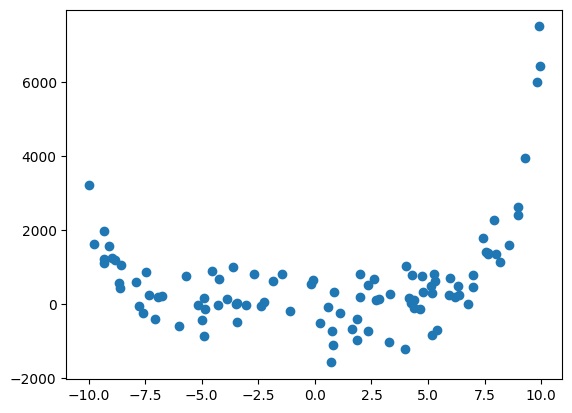

In [ ]:
xdata, ydata = proved_experiment_Linux()
plt.scatter(xdata, ydata);

Řešení úlohy:

In [20]:
## DOPLŇTE ##